# Notes on Data:
- Do things like 'CustomerId', 'Geography', 'Gender', and 'Surname' have an impact?
- Lower Customer Id could means that they have been a longer member and are more loyal.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

import xgboost as xgb

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_id = test['CustomerId']

In [2]:
train.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Does Geography and Gender play a role?
- Table below shows if there is any 'weirdness' in the data.
### Looking at the Geography:
- In terms of geography there seems to be more people that stayed than left in general.
- Spain and France seem to have the most difference between the two
### Looking at Gender:
- In the data there are more men than women.
- Even though this is the case men are seen to have a higher differnce than the women.
### Is the Data Useful?
- Even though there do seem to be some trends I think it is best to not include it. 
- This is because I dont want to create any unecceary bias in the models predictions. 

In [4]:
df_cat = ['Geography', 'Gender']

for i in df_cat:
    cont_table = pd.crosstab(train[i], train['Exited']).unstack()
    print(cont_table)

Exited  Geography
0       France       78643
        Germany      21492
        Spain        29978
1       France       15572
        Germany      13114
        Spain         6235
dtype: int64
Exited  Gender
0       Female    51779
        Male      78334
1       Female    20105
        Male      14816
dtype: int64


# Cleaning the Data

In [5]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
def clean(data):
    data = data.drop(['CustomerId', 'Surname', 'Geography', 'Gender', 'Age'], axis=1)
    
    return data 

train = clean(train)
test = clean(test)

y_train = train['Exited']
X_train = train.drop(['Exited'], axis=1)

X_test = test

train.head(5)

,id,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,668,3,0.00,2,1.0,0.0,181449.97,0
1,1,627,1,0.00,2,1.0,1.0,49503.50,0
2,2,678,10,0.00,2,1.0,0.0,184866.69,0
3,3,581,2,148882.54,1,1.0,1.0,84560.88,0
4,4,716,5,0.00,2,1.0,1.0,15068.83,0


# Training the Model:
- Using XGBoost to train a regression model 

In [7]:
reg = xgb.XGBRegressor(n_estimators=7000, early_stopping_rounds=50)
reg.fit(
    X_train, 
    y_train,
    eval_set=[(X_train, y_train)], 
    verbose=500
    )



[0]	validation_0-rmse:0.38233


[500]	validation_0-rmse:0.29896
[1000]	validation_0-rmse:0.26528
[1500]	validation_0-rmse:0.23894
[2000]	validation_0-rmse:0.21743
[2500]	validation_0-rmse:0.19905
[3000]	validation_0-rmse:0.18293
[3500]	validation_0-rmse:0.16917
[4000]	validation_0-rmse:0.15706
[4500]	validation_0-rmse:0.14643
[5000]	validation_0-rmse:0.13689
[5500]	validation_0-rmse:0.12797
[6000]	validation_0-rmse:0.11961
[6500]	validation_0-rmse:0.11204
[6999]	validation_0-rmse:0.10524


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=7000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Feature Importance 

In [8]:
f1 = pd.DataFrame(
    data=reg.feature_importances_, 
    index=reg.feature_names_in_, 
    columns=['Importance']
    )

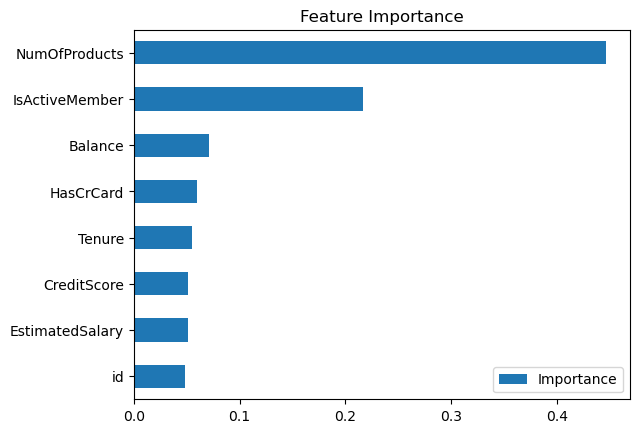

In [9]:
f1.sort_values('Importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Using Model to Predict Test Set

In [10]:
reg = reg.predict(X_test)

array([ 0.23061052,  0.62752324,  0.13212985, ..., -0.1741219 ,
        0.31247768,  0.18386894], dtype=float32)

In [11]:
reg.save_model('churner.txt')

C:\Users\Kartik Mehta\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [23:11:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [22]:
df = pd.DataFrame({'id':test_id.values,
                   'Exited':reg.predict(X_test)
                   })

In [23]:
df.to_csv('churner_submissions.csv', index=False)